In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('/Users/angelye/Desktop/python/Dry_Bean_Dataset.xlsx')
y = df["Area"]

num_cols = df.select_dtypes(include=[np.number]).columns
X = df[num_cols].drop(columns=["Area"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [7]:
#####SVR

In [8]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=50, gamma=0.2, epsilon=0.01))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mae)

MSE: 580558009.4033333
RMSE: 24094.771412141126
R2: 0.3257199726128357
MAE: 7574.18633836707


In [9]:
#take log
y = np.log(df["Area"])

num_cols = df.select_dtypes(include=[np.number]).columns
X = df[num_cols].drop(columns=["Area"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=50, gamma=0.2, epsilon=0.01))
])

model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

y_pred = np.exp(y_pred_log)
y_true = df["Area"].iloc[y_test.index]

print("MSE:", mean_squared_error(y_true, y_pred))
print("R2:", r2_score(y_true, y_pred))
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

MSE: 2709261.0682110977
R2: 0.9968533710711358
RMSE: 1645.9833134667854
MAE: 422.9131926369173


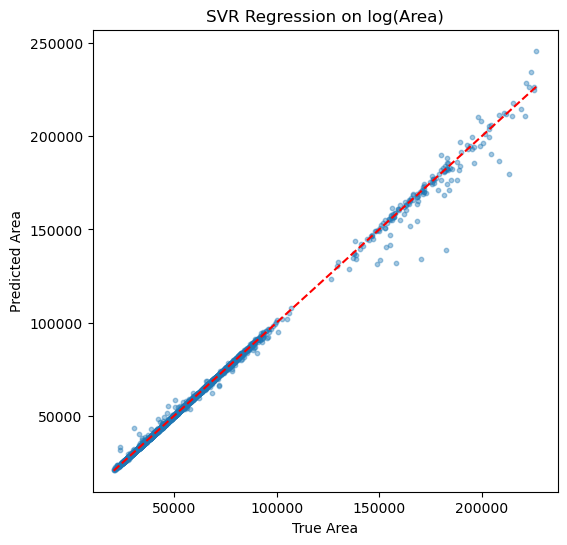

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.4, s=10)
plt.xlabel("True Area")
plt.ylabel("Predicted Area")
plt.title("SVR Regression on log(Area)")
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()], 'r--')
plt.show()

In [ ]:
#####Random Forest

In [12]:
y = np.log(df["Area"])

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_log = rf.predict(X_test)

y_pred = np.exp(y_pred_log)
y_true = df["Area"].iloc[y_test.index]

print("MSE:", mean_squared_error(y_true, y_pred))
print("R2:", r2_score(y_true, y_pred))

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


MSE: 10961.930496982819
R2: 0.9999872684371311
RMSE: 104.69923828272496
MAE: 18.34568204289266


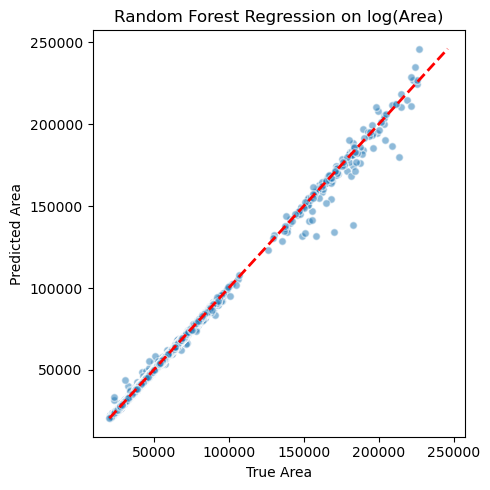

In [22]:
#scatter
plt.figure(figsize=(6, 5))
plt.scatter(y_true, y_pred, alpha=0.5, edgecolor='white', s=30)

min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel("True Area", fontsize=10)
plt.ylabel("Predicted Area",fontsize=10)
plt.title("Random Forest Regression on log(Area)")

plt.tight_layout()
plt.show()

In [ ]:
##### Ridge & Lasso

In [23]:
feature_names = X_train.columns 

alphas = np.logspace(-3, 3, 13)   # 1e-3, 1e-2, ..., 1e3

# 1. 岭回归 RidgeCV

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas, cv=5))
])

ridge_pipe.fit(X_train, y_train)
y_pred_ridge = ridge_pipe.predict(X_test)
ridge = ridge_pipe.named_steps["ridge"]

print("===== Ridge Regression =====")
print("Best alpha:", ridge.alpha_)
print("MSE :", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :", mean_absolute_error(y_test, y_pred_ridge))
print("R2  :", r2_score(y_test, y_pred_ridge))

ridge_coef = pd.Series(ridge.coef_, index=feature_names)
ridge_coef_sorted = ridge_coef.reindex(ridge_coef.abs().sort_values(ascending=False).index)
print("\nRidge coefficients (sorted by |coef|):")
print(ridge_coef_sorted)

# 2. Lasso 回归 LassoCV
lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(alphas=alphas, cv=5, max_iter=5000, n_jobs=-1))
])

lasso_pipe.fit(X_train, y_train)
y_pred_lasso = lasso_pipe.predict(X_test)
lasso = lasso_pipe.named_steps["lasso"]

print("\n===== Lasso Regression =====")
print("Best alpha:", lasso.alpha_)
print("MSE :", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :", mean_absolute_error(y_test, y_pred_lasso))
print("R2  :", r2_score(y_test, y_pred_lasso))

lasso_coef = pd.Series(lasso.coef_, index=feature_names)

selected_features = lasso_coef[lasso_coef != 0].index.tolist()
dropped_features  = lasso_coef[lasso_coef == 0].index.tolist()

print("\nLasso coefficients (only non-zero):")
print(lasso_coef[lasso_coef != 0].sort_values(key=abs, ascending=False))

print("\nSelected features by Lasso (非零系数):")
print(selected_features)

print("\nDropped features by Lasso (系数=0):")
print(dropped_features)


===== Ridge Regression =====
Best alpha: 0.001
MSE : 1.3604252537045624e-06
RMSE: 0.0011663726907402121
MAE : 0.0007508567082110068
R2  : 0.9999919011382169

Ridge coefficients (sorted by |coef|):
EquivDiameter      0.379980
Compactness       -0.191046
ShapeFactor3       0.167029
ConvexArea        -0.128620
ShapeFactor1      -0.110744
ShapeFactor2      -0.055876
MajorAxisLength   -0.021232
Perimeter          0.015398
MinorAxisLength    0.012247
roundness          0.002208
Eccentricity      -0.002102
AspectRatio        0.001725
Solidity          -0.001496
ShapeFactor4       0.000322
Extent             0.000020
dtype: float64

===== Lasso Regression =====
Best alpha: 0.001
MSE : 6.356540947495915e-05
RMSE: 0.007972791824383674
MAE : 0.005680882160566966
R2  : 0.9996215834246519

Lasso coefficients (only non-zero):
ShapeFactor1      -0.167255
MajorAxisLength    0.128937
ShapeFactor2      -0.067900
MinorAxisLength    0.054924
Perimeter          0.026683
AspectRatio        0.011457
EquivDia

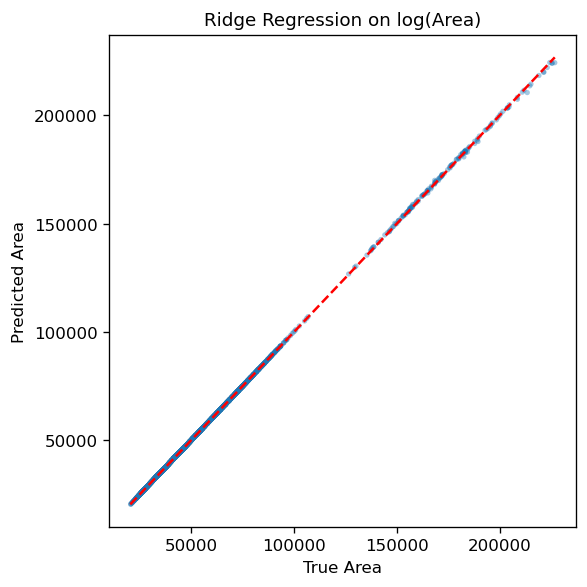

In [33]:
y_true_ridge = np.exp(y_test)
y_pred_ridge_area = np.exp(y_pred_ridge)

plt.figure(figsize=(5, 5), dpi=120)

plt.scatter(y_true_ridge, y_pred_ridge_area, alpha=0.44, s=10, edgecolor='none')

min_val = min(y_true_ridge.min(), y_pred_ridge_area.min())
max_val = max(y_true_ridge.max(), y_pred_ridge_area.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=1.5)

plt.xlabel("True Area", fontsize=10)
plt.ylabel("Predicted Area", fontsize=10)
plt.title("Ridge Regression on log(Area)", fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
##### KNN

In [24]:
from sklearn.model_selection import GridSearchCV
# KNN
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())
])

param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 15],
    "knn__weights": ["uniform", "distance"],  #weight
    "knn__p": [1, 2],  # Manhattan /Euclidean
}

grid_knn = GridSearchCV(
    knn_pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

print("===== KNN Regressor =====")
print("Best params:", grid_knn.best_params_)

y_pred_knn = grid_knn.predict(X_test)

mse  = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred_knn)
r2   = r2_score(y_test, y_pred_knn)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


===== KNN Regressor =====
Best params: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
MSE : 0.00028299520212572894
RMSE: 0.01682246123864546
MAE : 0.010886552585891125
R2  : 0.998315277505283


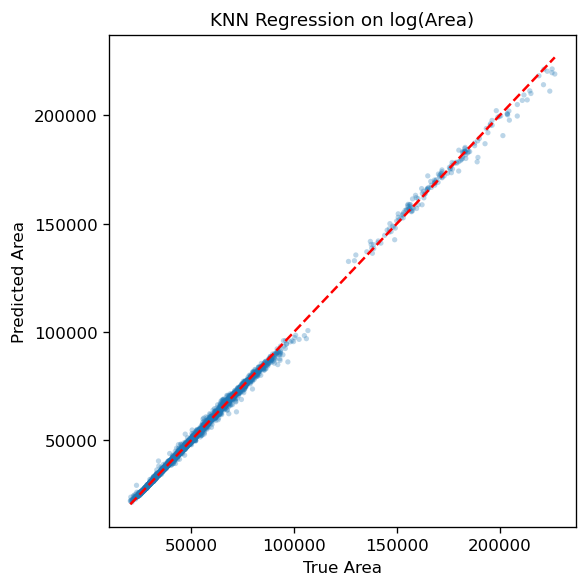

In [31]:
y_true_knn = np.exp(y_test)
y_pred_knn_area = np.exp(y_pred_knn)

plt.figure(figsize=(5, 5), dpi=120)
plt.scatter(y_true_knn, y_pred_knn_area, alpha=0.3, s=10, edgecolor='none')

min_val = min(y_true_knn.min(), y_pred_knn_area.min())
max_val = max(y_true_knn.max(), y_pred_knn_area.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=1.5)

plt.xlabel("True Area", fontsize=10)
plt.ylabel("Predicted Area", fontsize=10)
plt.title("KNN Regression on log(Area)", fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
##### LinearRegression

In [25]:
X1_train = X_train[["EquivDiameter"]]
X1_test  = X_test[["EquivDiameter"]]

lin1 = LinearRegression()
lin1.fit(X1_train, y_train)

y_pred_lin1 = lin1.predict(X1_test)
print("Simple linear (EquivDiameter only) R2:", r2_score(y_test, y_pred_lin1))


Simple linear (EquivDiameter only) R2: 0.9711357632471567


In [26]:
lin_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

lin_pipe.fit(X_train, y_train)
y_pred_lin = lin_pipe.predict(X_test)

mse  = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred_lin)
r2   = r2_score(y_test, y_pred_lin)

print("===== Linear Regression (Multiple) =====")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


===== Linear Regression (Multiple) =====
MSE : 1.356335416948373e-06
RMSE: 0.0011646181421171374
MAE : 0.0007480052395973096
R2  : 0.9999919254857674


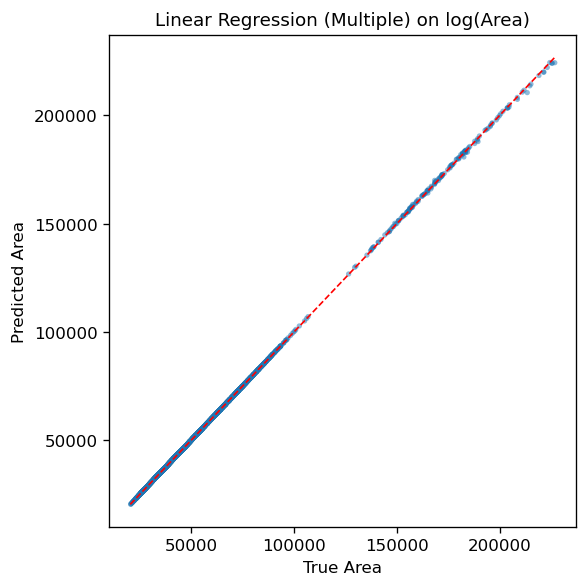

In [30]:
y_true = np.exp(y_test)
y_pred = np.exp(y_pred_lin)  

plt.figure(figsize=(5, 5), dpi=120)

plt.scatter(y_true, y_pred, alpha=0.5, s=10, edgecolor="none")

min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=1)

plt.xlabel("True Area", fontsize=10)
plt.ylabel("Predicted Area", fontsize=10)
plt.title("Linear Regression (Multiple) on log(Area)", fontsize=11)

plt.tight_layout()
plt.show()
